In [145]:
#first import libraries needed
from __future__ import print_function, absolute_import, division
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import initializers
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import regularizers
import seaborn as sns

In [128]:
#define training parameters required, every other parameter gets its defualt value
num_input = 28*28
num_output = 10
batch_size = 256

#define layer's number of neurons
hidden_1_neurons=128
hidden_2_neurons=256

RMSprop_learning_rate=0.001
SGD_learning_rate=0.01

#define number of training steps according to 100 epochs and batch size
epochs = 100

In [4]:
#import MNIST dataset
from tensorflow.keras.datasets import mnist
#prepare MNIST dataset, MNIST has 784 features and 10 classes of digits
(x_train, y_train),(x_test, y_test)= mnist.load_data()
#convert to type=float32
x_train, x_test = np.array(x_train,np.float32), np.array(x_test,np.float32)
#flatten images to 1-D vector of 784 possible features (28X28)
x_train, x_test = x_train.reshape([-1, num_input]), x_test.reshape([-1,num_input])
# Normalize images value from [0, 255] to [0 , 1]
x_train,x_test = x_train/255.,x_test/255.
print("Dimensions of training data: " + str(x_train.shape))

11501568/11490434 [==============================] - 0s 0us/step
Dimensions of training data: (60000, 784)


In [5]:
#create validation set
split_size = int(x_train.shape[0]*0.8)
x_train, x_val = x_train[:split_size], x_train[split_size:]
y_train, y_val = y_train[:split_size], y_train[split_size:]
print(x_train.shape,x_val.shape)

(48000, 784) (12000, 784)


In [58]:
#define first model with sgd optimizer (model_1)
#Initializer that generates tensors with a normal distribution and mean 10.
init_val= tf.keras.initializers.RandomNormal(mean=10.0)

model_1=tf.keras.Sequential([
   tf.keras.layers.Flatten( input_shape=(28*28, )),
    tf.keras.layers.Dense( hidden_1_neurons, activation='relu', kernel_initializer=init_val),
    tf.keras.layers.Dense( hidden_2_neurons, activation='relu', kernel_initializer=init_val),
    tf.keras.layers.Dense(10, activation='softmax')
])
# SGD optimizer 
opt1 = tf.keras.optimizers.SGD(learning_rate = SGD_learning_rate)
#use categorical cross entropy as objective function, use accuracy as a metric evaluation
model_1.compile(optimizer=opt1,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model_1.summary()

history_1=model_1.fit(x_train,y_train, validation_data=(x_val, y_val) ,batch_size=batch_size,epochs=epochs,shuffle=True)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_21 (Flatten)        (None, 784)               0         
                                                                 
 dense_63 (Dense)            (None, 128)               100480    
                                                                 
 dense_64 (Dense)            (None, 256)               33024     
                                                                 
 dense_65 (Dense)            (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
188/188 [==============================] - 1s 6ms/step - loss: 3219120384.0000 - accuracy: 0.1137 - val_loss: 2.3023 - val_accuracy: 0.1060
Epoch 2/100
188/188 [======

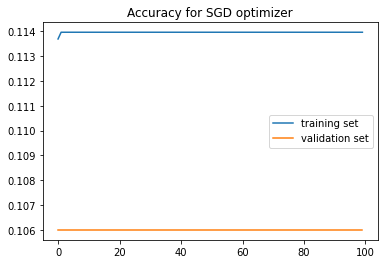

In [59]:
#plot model with sgd optimizer (model_1)
plt.figure(1)
plt.plot(history_1.history['loss'], label='training set')
plt.plot(history_1.history['val_loss'], label='validation set')
plt.legend()
plt.title('Learning curves of SGD optimizer')
plt.show()
plt.figure(2)
plt.plot(history_1.history['accuracy'], label='training set')
plt.plot(history_1.history['val_accuracy'], label='validation set')
plt.legend()
plt.title('Accuracy for SGD optimizer')
plt.show()

In [60]:
#define second model with RMSProp optimizer (model_2) 
#optimizers with rho=0.01 and rho=0.99
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28*28, )),
    tf.keras.layers.Dense( hidden_1_neurons, activation='relu'),
    tf.keras.layers.Dense( hidden_2_neurons, activation='relu') , 
    tf.keras.layers.Dense(10, activation='softmax')
])

# RMSprop optimizer
opt2_1 = tf.keras.optimizers.RMSprop(learning_rate=RMSprop_learning_rate,rho=0.01)
opt2_2 = tf.keras.optimizers.RMSprop(learning_rate=RMSprop_learning_rate,rho=0.99)

#use categorical cross entropy as objective function, use accuracy as a metric evaluation
model_2.compile(optimizer=opt2_1,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model_2.summary()

history_2=model_2.fit(x_train,y_train, validation_data=(x_val, y_val) ,batch_size=batch_size,epochs=epochs,shuffle=True)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 784)               0         
                                                                 
 dense_66 (Dense)            (None, 128)               100480    
                                                                 
 dense_67 (Dense)            (None, 256)               33024     
                                                                 
 dense_68 (Dense)            (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
188/188 [==============================] - 2s 6ms/step - loss: 0.4750 - accuracy: 0.8660 - val_loss: 0.2314 - val_accuracy: 0.9314
Epoch 2/100
188/188 [===============

prediction: 7
prediction: 2
prediction: 1
prediction: 0
prediction: 4


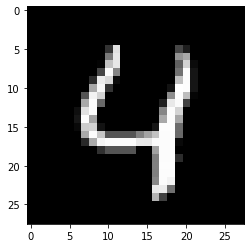

In [25]:
n_im=5
test_image = x_test[:n_im]
predictions = model_2(test_image)

for i in range(n_im):
    plt.imshow(np.reshape(test_image[i],[28,28]),cmap='gray')
    plt.show()
    print("prediction: %i" % np.argmax(predictions.numpy()[i]))


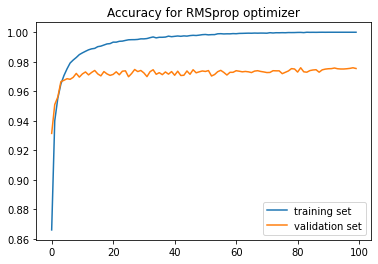

In [61]:
#plot model with RMSProp optimizer (model_2)
plt.figure(3)
plt.plot(history_2.history['loss'], label='training set')
plt.plot(history_2.history['val_loss'], label='validation set')
plt.legend()
plt.title('Learning curves of RMSProp optimizer')
plt.show()
plt.figure(4)
plt.plot(history_2.history['accuracy'], label='training set')
plt.plot(history_2.history['val_accuracy'], label='validation set')
plt.legend()
plt.title('Accuracy for RMSprop optimizer')
plt.show()

In [62]:
#Add l2-regularizer on SGD (model_1_l2)
model_1_l2=tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=(28*28, )),
    tf.keras.layers.Dense( hidden_1_neurons, activation='relu', kernel_regularizer=regularizers.l2(0.01), kernel_initializer=init_val),
    tf.keras.layers.Dense( hidden_2_neurons, activation='relu',kernel_regularizer=regularizers.l2(0.01), kernel_initializer=init_val) , 
    tf.keras.layers.Dense(10, activation='softmax')
])
model_1_l2.compile(optimizer=opt1,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model_1_l2.summary()
history_1_l2=model_1_l2.fit(x_train,y_train, validation_data=(x_val, y_val) ,batch_size=batch_size,epochs=100)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 784)               0         
                                                                 
 dense_69 (Dense)            (None, 128)               100480    
                                                                 
 dense_70 (Dense)            (None, 256)               33024     
                                                                 
 dense_71 (Dense)            (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
188/188 [==============================] - 2s 6ms/step - loss: 224663879680.0000 - accuracy: 0.1130 - val_loss: 215498063872.0000 - val_accuracy: 0.1060
Epoch 2/100
18

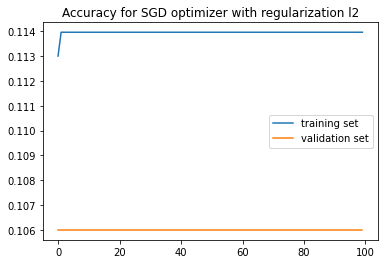

In [63]:
#plot model with sgd optimizer and l2 regularizer (model_1_l2)
plt.figure(3)
plt.plot(history_1_l2.history['loss'], label='training set')
plt.plot(history_1_l2.history['val_loss'], label='validation set')
plt.legend()
plt.title('Learning curves of SGD optimizer with regularization l2')
plt.show()
plt.figure(4)
plt.plot(history_1_l2.history['accuracy'], label='training set')
plt.plot(history_1_l2.history['val_accuracy'], label='validation set')
plt.legend()
plt.title('Accuracy for SGD optimizer with regularization l2')
plt.show()

In [65]:
#Add l2-regularizer on model with RMSProp optimizer , set a=0.1,a=0.01,a=0.001
a=0.01
model_2_l2=tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=(28*28, )),
    tf.keras.layers.Dense( hidden_1_neurons, activation='relu', kernel_regularizer=regularizers.l2(a)),
    tf.keras.layers.Dense( hidden_2_neurons, activation='relu',kernel_regularizer=regularizers.l2(a)) , 
    tf.keras.layers.Dense(10, activation='softmax')
])
model_2_l2.compile(optimizer=opt2_1,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model_2_l2.summary()
history_2_l2=model_2_l2.fit(x_train,y_train, validation_data=(x_val, y_val) ,batch_size=batch_size,epochs=100)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 784)               0         
                                                                 
 dense_69 (Dense)            (None, 128)               100480    
                                                                 
 dense_70 (Dense)            (None, 256)               33024     
                                                                 
 dense_71 (Dense)            (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
188/188 [==============================] - 2s 6ms/step - loss: 1.9316 - accuracy: 0.8403 - val_loss: 0.9454 - val_accuracy: 0.9062
Epoch 2/100
188/188 [===============

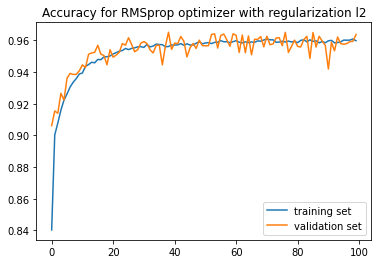

In [67]:
#plot model with RMSProp optimizer and l2 regularizer (model_1_l2)
plt.figure(3)
plt.plot(history_2_l2.history['loss'], label='training set')
plt.plot(history_2_l2.history['val_loss'], label='validation set')
plt.legend()
plt.title('Learning curves of RMSProp optimizer with regularization l2')
plt.show()
plt.figure(4)
plt.plot(history_2_l2.history['accuracy'], label='training set')
plt.plot(history_2_l2.history['val_accuracy'], label='validation set')
plt.legend()
plt.title('Accuracy for RMSprop optimizer with regularization l2')
plt.show()

In [70]:
#Add l1-regularizer and dropout layer on model with SGD optimizer (model_1_l1)
model_1_l1=models.Sequential()
model_1_l1.add(layers.Flatten( input_shape=(28*28, )))
model_1_l1.add(layers.Dense(hidden_1_neurons, activation='relu', kernel_regularizer=regularizers.l1(0.01),kernel_initializer=init_val))
model_1_l1.add(layers.Dropout(0.3))
model_1_l1.add(layers.Dense(hidden_2_neurons, activation='relu',kernel_regularizer=regularizers.l1(0.01),kernel_initializer=init_val) )
model_1_l1.add(layers.Dense(10, activation='softmax'))
model_1_l1.compile(optimizer=opt1,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model_1_l1.summary()
history_1_l1=model_1_l1.fit(x_train,y_train, validation_data=(x_val, y_val) ,batch_size=batch_size,epochs=100)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_28 (Flatten)        (None, 784)               0         
                                                                 
 dense_84 (Dense)            (None, 128)               100480    
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_85 (Dense)            (None, 256)               33024     
                                                                 
 dense_86 (Dense)            (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
188/188 [==========================

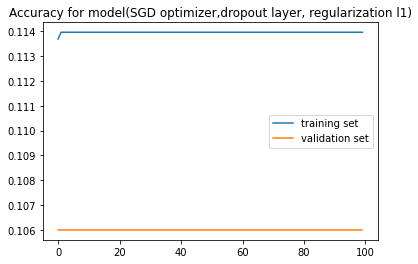

In [76]:

# plot model with SGD optimizer, regularizer l1 and dropout layer (model_1_l1)
plt.figure(3)
plt.plot(history_1_l1.history['loss'], label='training set')
plt.plot(history_1_l1.history['val_loss'], label='validation set')
plt.legend()
plt.title('Learning curves of model(SGD optimizer,dropout layer, regularization l1)')
plt.show()
plt.figure(4)
plt.plot(history_1_l1.history['accuracy'], label='training set')
plt.plot(history_1_l1.history['val_accuracy'], label='validation set')
plt.legend()
plt.title('Accuracy for model(SGD optimizer,dropout layer, regularization l1)')
plt.show()

In [112]:
#define model with RMSProp optimizer, regularizer l1 and dropout layer (Model_2_l1) 
model_2_l1=models.Sequential()
model_2_l1.add(layers.Flatten( input_shape=(28*28, )))
model_2_l1.add(layers.Dense( hidden_1_neurons, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model_2_l1.add(layers.Dropout(0.3))
model_2_l1.add(layers.Dense( hidden_2_neurons, activation='relu', kernel_regularizer=regularizers.l1(0.01)))    
model_2_l1.add(layers.Dense(10, activation='softmax'))

model_2_l1.compile(optimizer=opt2_2,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model_2_l1.summary()
history_2_l1=model_2_l1.fit(x_train,y_train, validation_data=(x_val, y_val) ,batch_size=batch_size,epochs=100)

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_53 (Flatten)        (None, 784)               0         
                                                                 
 dense_159 (Dense)           (None, 128)               100480    
                                                                 
 dropout_37 (Dropout)        (None, 128)               0         
                                                                 
 dense_160 (Dense)           (None, 256)               33024     
                                                                 
 dense_161 (Dense)           (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
188/188 [==========================

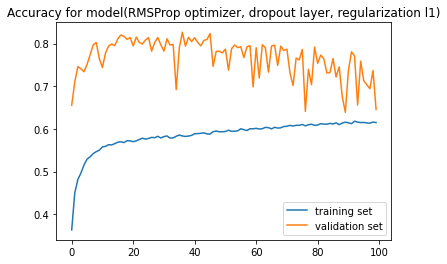

In [114]:
# plot model with RMSProp optimizer, regularizer l1 and dropout layer (model_1_l1)
plt.figure(3)
plt.plot(history_2_l1.history['loss'], label='training set')
plt.plot(history_2_l1.history['val_loss'], label='validation set')
plt.legend()
plt.title('Learning curves of model(RMSProp optimizer, dropout layer, regularization l1)')
plt.show()
plt.figure(4)
plt.plot(history_2_l1.history['accuracy'], label='training set')
plt.plot(history_2_l1.history['val_accuracy'], label='validation set')
plt.legend()
plt.title('Accuracy for model(RMSProp optimizer, dropout layer, regularization l1)')
plt.show()

In [223]:
#Import keras tuner to help create hypermodels of our model
import keras_tuner as kt
from tensorflow.keras import callbacks
from keras import backend as K
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn import metrics

In [224]:
#define the dataset again
(x_train, y_train),(x_test, y_test)= mnist.load_data()
#convert to type=float32
x_train, x_test = np.array(x_train,np.float32), np.array(x_test,np.float32)
#flatten images to 1-D vector of 784 possible features (28X28)
x_train, x_test = x_train.reshape([-1, num_input]), x_test.reshape([-1,num_input])
# Normalize images value from [0, 255] to [0 , 1]
x_train,x_test = x_train/255.,x_test/255.

In [225]:
#model build

#define initializer, the network is built according to the assignment's requirements
initializer = tf.keras.initializers.HeNormal()

# define metrics that have been removed from keras
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
    
#taken from old keras source code
def get_f1(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

# define the model
def model_builder(hp):

    model=tf.keras.Sequential()
    model.add(layers.Flatten( input_shape=(28*28, )))

    hp_units_1=hp.Int('units_1',min_value=64, max_value=128,step=64)
    hp_units_2=hp.Int('units_2',min_value=256, max_value=512,step=256)      
    hp_regularizer=hp.Choice('regularizers',values=[0.1,0.001,0.000001])
    hp_learning_rate=hp.Choice('learning_rate',values=[0.1,0.01,0.001])
    
        
    #first hidden layer
    model.add(layers.Dense(units=hp_units_1,activation='relu',
    kernel_initializer=initializer,
    kernel_regularizer=regularizers.l2(hp_regularizer)))

    #second hidden layer
    model.add(layers.Dense(units=hp_units_2,
    activation='relu',
    kernel_initializer=initializer,
    kernel_regularizer=regularizers.l2(hp_regularizer)))
    
    #output layer
    model.add(layers.Dense(10,activation='softmax'))

  
    #compile the model 
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=hp_learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy', get_f1, precision_m, recall_m])
    #metrics=[f1_m])
    return model

In [227]:
tuner = kt.Hyperband(model_builder,
                     objective=kt.Objective("val_get_f1", direction="min") ,
                     max_epochs=10,
                     directory='my_dir',
                     project_name='My_tuner',
                     overwrite=True)
#tuner = kt.Hyperband(model_builder,objective='val_accuracy',max_epochs=10,directory='my_dir',project_name='My_tuner',overwrite=True)

stop_early=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=200)

tuner.search(x_train, y_train, epochs=1000, validation_split=0.2, callbacks=[stop_early])

best_hyperparams=tuner.get_best_hyperparameters(num_trials=1)[0]

final_model = tuner.hypermodel.build(best_hyperparams)
final_model.summary()

Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2104 - accuracy: 0.9620 - get_f1: 1.0709 - precision_m: 1.0260 - recall_m: 1.1224 - val_loss: 0.1848 - val_accuracy: 0.9682 - val_get_f1: 1.0490 - val_precision_m: 1.0033 - val_recall_m: 1.1011
Epoch 8/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1849 - accuracy: 0.9659 - get_f1: 1.0535 - precision_m: 1.0076 - recall_m: 1.1059 - val_loss: 0.1924 - val_accuracy: 0.9653 - val_get_f1: 1.0285 - val_precision_m: 0.9818 - val_recall_m: 1.0818
Epoch 9/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1738 - accuracy: 0.9670 - get_f1: 1.0470 - precision_m: 1.0008 - recall_m: 1.0998 - val_loss: 0.1993 - val_accuracy: 0.9608 - val_get_f1: 1.0620 - val_precision_m: 1.0153 - val_recall_m: 1.1153
Epoch 10/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1673 - accuracy: 0.9685 - get_f1: 1.0398 - precision_m: 0.9937 - recall_m: 1.0925 - val_loss: 0.1689 - va

In [228]:
#train the final model
history_hypermodel = final_model.fit(x_train, y_train, epochs=100, validation_split=0.2)
eval_result=final_model.evaluate(x_test,y_test)
print('[test loss,test accuracy,get_F1,Precision,Recall]',eval_result )

Epoch 66/100
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0168 - accuracy: 0.9961 - get_f1: 0.9518 - precision_m: 0.9058 - recall_m: 1.0047 - val_loss: 0.2846 - val_accuracy: 0.9732 - val_get_f1: 0.9601 - val_precision_m: 0.9132 - val_recall_m: 1.0138
Epoch 67/100
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0185 - accuracy: 0.9958 - get_f1: 0.9525 - precision_m: 0.9064 - recall_m: 1.0054 - val_loss: 0.2759 - val_accuracy: 0.9743 - val_get_f1: 0.9601 - val_precision_m: 0.9132 - val_recall_m: 1.0137
Epoch 68/100
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0185 - accuracy: 0.9960 - get_f1: 0.9523 - precision_m: 0.9062 - recall_m: 1.0052 - val_loss: 0.2683 - val_accuracy: 0.9748 - val_get_f1: 0.9596 - val_precision_m: 0.9127 - val_recall_m: 1.0133
Epoch 69/100
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0182 - accuracy: 0.9963 - get_f1: 0.9516 - precision_m: 0.9055 - recall_m: 1.0044 - val_loss: 0.30

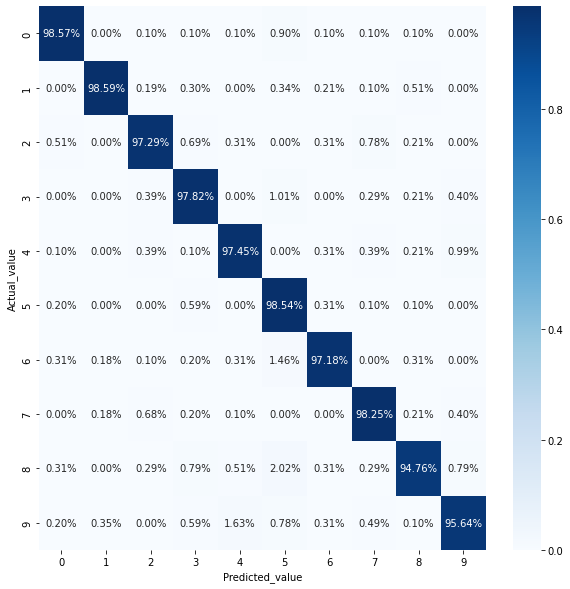

In [229]:

# compute confusion matrix 
y_pred=final_model.predict(x_test)
con_mat = metrics.confusion_matrix(y_test,y_pred.argmax(axis=1))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap((con_mat / con_mat.astype(float).sum(axis=1)), annot=True, fmt='.2%', cmap='Blues')
plt.ylabel('Actual_value')
plt.xlabel('Predicted_value')
plt.show(block=True)

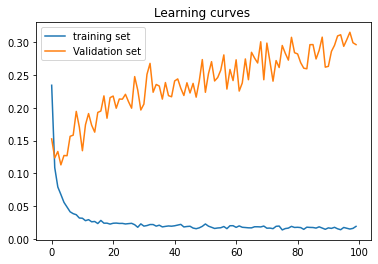

In [230]:

#learning curves for training and validation data
plt.figure(1)
plt.plot(history_hypermodel.history['loss'], label='training set')
plt.plot(history_hypermodel.history['val_loss'], label='Validation set')
plt.legend()
plt.title('Learning curves ')
plt.show()